# Lession 15 - Parameters

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\yoder\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("../data/Iris-cleaned.csv")
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
features = df.drop(df.columns[-1], axis=1)
features = (features - features.mean())/features.std()
features.head(3)

,sepal length,sepal width,petal length,petal width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593


In [4]:
target = df["species"]
target = pd.get_dummies(target)
target.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [5]:
X = features.values
y = target.values

In [6]:
model = Sequential()
model.add(Dense(6, input_shape=(4,)))  # 4 inputs and 6 outputs
model.add(Activation('relu'))
model.add(Dense(5))    # 5 outputs
model.add(Activation('relu'))
model.add(Dense(3))    # 3 outputs
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer='SGD')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
activation_1 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 35        
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


I don't know if the following makes sense

RMSE valication =  1.0415465985082057


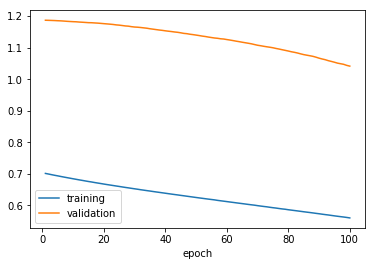

In [8]:
hist = model.fit(X, y, epochs=100, validation_split=0.2, verbose=0)
results = pd.DataFrame()
results['epoch'] = hist.epoch
results['epoch'] = results['epoch'] + 1
results['training'] = np.sqrt(hist.history['loss'])
results['validation'] = np.sqrt(hist.history['val_loss'])
# results['baseline'] = y.std()
ax = results.plot.line(x='epoch', y='training')
ax = results.plot.line(x='epoch', y='validation', ax = ax)
# ax = results.plot.line(x='epoch', y='baseline',   ax = ax)
print('RMSE valication = ', results.validation.iloc[-1])